In [19]:
%%shell
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
pip install imblearn

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.13.0-py2.py3-none-any.whl size=245154 sha256=dd3ada01e1c00514d3fd5934c1bb084393207b45889358b34a19d71aba91f98c
  Stored in directory: /tmp/pip-ephem-wheel-cache-fz93kwt0/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [40]:
!zip -r Model.zip Model

  adding: Model/ (stored 0%)
  adding: Model/assets/ (stored 0%)
  adding: Model/variables/ (stored 0%)
  adding: Model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: Model/variables/variables.index (deflated 61%)
  adding: Model/saved_model.pb (deflated 90%)


# New

Mounted at /content/gdrive


***INSIGHTS INITIALIZATION***




***BEST***


(2669, 116)
FOLD = 1
[0.52994792 8.84782609]
Epoch 1/150
16/16 [==============================] - 3s 103ms/step - loss: 0.4427 - accuracy: 0.4821 - val_loss: 0.2526 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 87ms/step - loss: 0.3874 - accuracy: 0.7672 - val_loss: 0.2513 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 83ms/step - loss: 0.4120 - accuracy: 0.7957 - val_loss: 0.2508 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 83ms/step - loss: 0.4434 - accuracy: 0.8146 - val_loss: 0.2505 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16

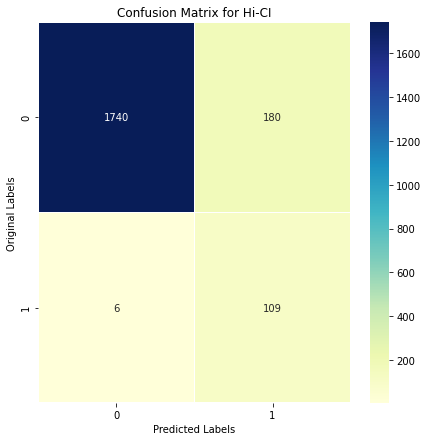



Macro F1 for Hi-CI = 0.7613860358958398


Micro F1 for Hi-CI = 0.7699999999999999


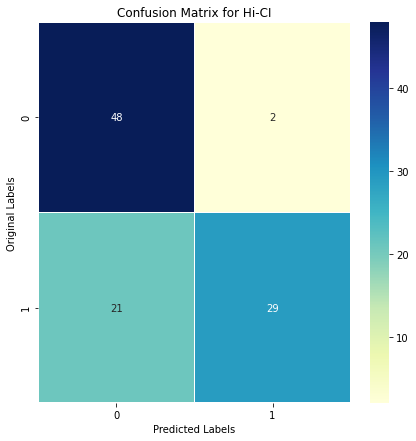



Macro F1 for Hi-CI = 0.6504839117875502


Micro F1 for Hi-CI = 0.8595505617977528


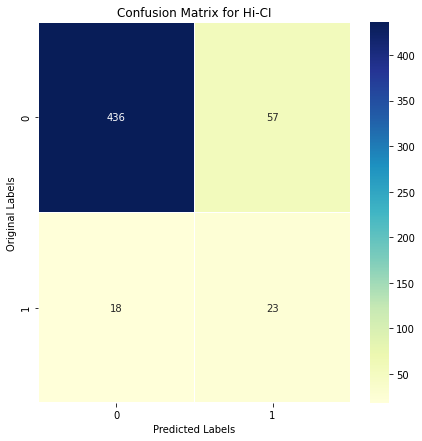

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_125 (Conv1D)          (None, 114, 32)           128       
_________________________________________________________________
dropout_200 (Dropout)        (None, 114, 32)           0         
_________________________________________________________________
conv1d_126 (Conv1D)          (None, 112, 32)           3104      
_________________________________________________________________
dropout_201 (Dropout)        (None, 112, 32)           0         
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 110, 32)           3104      
_________________________________________________________________
dropout_202 (Dropout)        (None, 110, 32)           0         
_________________________________________________________________
max_p

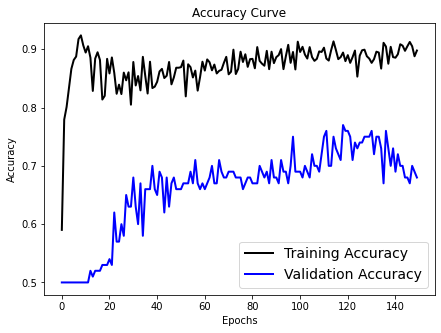

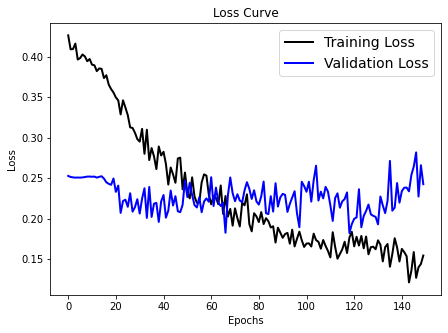

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import shap
from sklearn.metrics import classification_report
import pandas_profiling
import pandas as pd
from google.colab import drive
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
import warnings
from random import sample
import numpy as np
from imblearn.combine import SMOTEENN
import imblearn
import keras
from keras.utils import np_utils
import pickle
%matplotlib inline
class Insightx(object):
    def __init__(self,**kwargs):
        print('\n\n***INSIGHTS INITIALIZATION***\n\n')
        self.__data_set=kwargs['data']
        self.__data_set=self.__data_set.sort_values(by=[kwargs['id']],ignore_index=True)
        self.__targets=self.__data_set[kwargs['target_column']]
        for i in self.__data_set.columns:
            if isinstance(self.__data_set[i][0],str)==True:
                self.__data_set[i]=preprocessing.LabelEncoder().fit_transform(self.__data_set[i])
        self.__treatments=self.__data_set[kwargs['treatment']]
        self.__covariates=self.__data_set.drop(kwargs['treatment']+[kwargs['id']]+[kwargs['target_column']],axis='columns')
    def visualize(self):
        features=pd.concat([self.__covariates,self.__treatments],axis='columns').to_numpy()
        targets=self.__targets.to_numpy()
        embedded_features=TSNE(n_components=2).fit_transform(features)
        label=np.unique(targets)
        index=[[0]]*len(label)
        for j in label:
            index[j]=[i for i,x in enumerate(targets) if x==j]
        for i in range(0,len(label)):
            plt.scatter(embedded_features[index[i],0],embedded_features[index[i],1],label='Class %s' %targets[index[i]][0])
        plt.legend()
        plt.gcf().set_size_inches((15,15))
        plt.xlabel('Feature 0')
        plt.ylabel('Feature 1')
        plt.title('t-SNE Plot after Dimension Reduction to 2D')
        plt.show()
    def baseline(self,with_imbalance=False):
        print('\n\n***BASELINES***\n\n')
        features=pd.concat([self.__covariates,self.__treatments],axis='columns')
        features=StandardScaler().fit_transform(features)
        values=set(self.__targets.values.tolist())
        minimum=self.__targets.shape[0]
        classx=0
        for v in values:
            c=self.__targets.values.tolist().count(v)
            if c<minimum:
                minimum=c
                classx=v
        training_features,testing_features,training_targets,testing_targets=split(features=features,targets=self.__targets,test_percentage=35,classx=classx)
        if with_imbalance==False:
            training_features,training_targets=SMOTEENN(ratio='minority',random_state=0,smote=imblearn.over_sampling.SMOTE(random_state=0,sampling_strategy=0.7,k_neighbors=37),enn=imblearn.under_sampling.EditedNearestNeighbours(random_state=0,sampling_strategy='majority',n_neighbors=22,kind_sel='mode')).fit_resample(training_features,training_targets)
        DT=DecisionTreeClassifier().fit(training_features,training_targets)
        performance(testing_targets,DT.predict(testing_features),'Decision Tree')
        kNN=KNeighborsClassifier().fit(training_features,training_targets)
        performance(testing_targets,kNN.predict(testing_features),'k Nearest Neighbors')
        SVM=SVC().fit(training_features,training_targets)
        performance(testing_targets,SVM.predict(testing_features),'Support Vector Machine')
        LR=LogisticRegression().fit(training_features,training_targets)
        performance(testing_targets,LR.predict(testing_features),'Logistic Regression')
        # MLPC=dl_toolkit.MLPClassifier(layers=[116,200,50,2],Num_epochs=100,activation_function='tanh',learning_rate=0.01,optimizer='adam',lamda=0.01,dropout=0.2,Weight_init='xavier')
        # MLPC.fit(training_features,training_targets,testing_features,testing_targets)
        # performance(testing_targets,MLPC.predict(testing_features),'Deep Neural Network')
    def HiCI(self,encoding_dimension,with_imbalance=False,k_fold=5):
        print('\n\n***BEST***\n\n')
        self.__covariates=pd.DataFrame(PCA(n_components=55).fit_transform(self.__covariates))
        features=pd.concat([self.__covariates,self.__treatments],axis='columns').to_numpy()
        print(features.shape)
        targets=self.__targets.to_numpy()
        values=set(targets.tolist())
        minimum=targets.shape[0]
        classx=0
        for v in values:
            c=targets.tolist().count(v)
            if c<minimum:
                minimum=c
                classx=v
        skf=StratifiedKFold(n_splits=5,shuffle=True)
        fold=1
        for train_index,test_index in skf.split(features,targets):
            print('FOLD =',fold)
            fold+=1
            training_features,testing_features=features[train_index],features[test_index]
            training_targets,testing_targets=targets[train_index],targets[test_index]
            training_features,validation_features,training_targets,validation_targets=split(features=training_features,targets=training_targets,test_percentage=30,classx=classx)
            #training_features,validation_features,training_targets,validation_targets=train_test_split(training_features,training_targets,test_size=0.25,stratify=training_targets)
            # if with_imbalance==False:
            #     training_features,training_targets=SMOTEENN(ratio='minority',random_state=0,smote=imblearn.over_sampling.SMOTE(random_state=0,sampling_strategy=0.7,k_neighbors=37),enn=imblearn.under_sampling.EditedNearestNeighbours(random_state=0,sampling_strategy='majority',n_neighbors=22,kind_sel='mode')).fit_resample(training_features,training_targets)
            scaler=StandardScaler()
            scaler.fit(training_features)
            pickle.dump(scaler,open('Scaler','wb'))
            training_features=scaler.transform(training_features)
            validation_features=scaler.transform(validation_features)
            testing_features=scaler.transform(testing_features)
            training_features=training_features.reshape(training_features.shape[0],training_features.shape[1],1)
            validation_features=validation_features.reshape(validation_features.shape[0],validation_features.shape[1],1)
            testing_features=testing_features.reshape(testing_features.shape[0],testing_features.shape[1],1)
            cw=class_weight.compute_class_weight('balanced',np.unique(training_targets),training_targets)
            print(cw)
            NN=keras.models.Sequential([keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(training_features.shape[1],1)),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.MaxPooling1D(pool_size=3),
                                        keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu'),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu'),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.MaxPooling1D(pool_size=3),
                                        # keras.layers.Conv1D(filters=128,kernel_size=3,activation='relu'),
                                        # keras.layers.Dropout(rate=0.2),
                                        # keras.layers.MaxPooling1D(pool_size=3),
                                        keras.layers.Flatten(),
                                        keras.layers.Dense(units=300,activation='relu'),
                                        keras.layers.Dropout(rate=0.65),
                                        keras.layers.Dense(units=100,activation='relu'),
                                        keras.layers.Dropout(rate=0.65),
                                        keras.layers.Dense(units=20,activation='relu'),
                                        keras.layers.Dropout(rate=0.65),
                                        keras.layers.Dense(units=2,activation='softmax')])
            NN.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
            history=NN.fit(x=training_features,
                    y=keras.utils.to_categorical(training_targets),
                    epochs=150,
                    batch_size=128,
                    shuffle=True,
                    class_weight={0:1,1:12},
                    callbacks=[keras.callbacks.ModelCheckpoint('Model',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)],
                    validation_data=(validation_features,keras.utils.to_categorical(validation_targets)))
            NN=keras.models.load_model('Model')
            NN.evaluate(testing_features,keras.utils.to_categorical(testing_targets))
            predicted=np.argmax(NN.predict(testing_features),axis=1)
            performance(training_targets,np.argmax(NN.predict(training_features),axis=1),'Hi-CI')
            performance(validation_targets,np.argmax(NN.predict(validation_features),axis=1),'Hi-CI')
            performance(testing_targets,np.argmax(NN.predict(testing_features),axis=1),'Hi-CI')
            NN.save('Model')
            NN.summary()
            print(classification_report(testing_targets,predicted,target_names=['Class: Alive','Class: Expired']))
            plotting_epochs(history.history['accuracy'],history.history['val_accuracy'],'Accuracy')
            plotting_epochs(history.history['loss'],history.history['val_loss'],'Loss')
            break
        NN=keras.models.load_model('Model')
        background = training_features[np.random.choice(training_features.shape[0], 100, replace=False)]
        e = shap.DeepExplainer(NN, background)
        test_points=testing_features[:]
        shap_values = e.shap_values(test_points)
        column=self.__treatments.columns
        Shap(test_points[:,55:,0],column,np.asarray(shap_values)[0,:,55:,0])
            
  

    def profile(self,title,file):
        print('\n\n***PANDAS PROFILING***\n\n')
        self.__profile=pandas_profiling.ProfileReport(self.__data_set,title=title)
        self.__profile.to_file(output_file=file)


def Shap(test, column, shap_value):
  testing_treatment=pd.DataFrame(test,columns=column)
  shap.summary_plot(shap_value,testing_treatment)
  ABS_SHAP(shap_value,testing_treatment)


def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Negative Impact)")

def split(features,targets,test_percentage,classx):
    training_features=[]
    testing_features=[]
    training_targets=[]
    testing_targets=[]
    to_sample=round(targets.tolist().count(classx)*test_percentage/100)
    labels=list(set(targets.tolist()))
    class_count=len(labels)
    indices=[[] for i in range(class_count)]
    for i in range(targets.shape[0]):
        for j in range(len(labels)):
            if targets[i]==labels[j]:
                indices[j].append(i)
    test_samples=[]
    for i in range(len(labels)):
        test_samples=test_samples+sample(indices[i],to_sample)
    test_samples=set(test_samples)
    for i in range(targets.shape[0]):
        if i in test_samples:
            testing_features.append(features[i])
            testing_targets.append(targets[i])
        else:
            training_features.append(features[i])
            training_targets.append(targets[i])
    training_features=np.array(training_features)
    testing_features=np.array(testing_features)
    training_targets=np.array(training_targets)
    testing_targets=np.array(testing_targets)
    return training_features,testing_features,training_targets,testing_targets
def performance(testing_targets,predicted,model):
    print('\n\nMacro F1 for',model,'=',f1_score(testing_targets,predicted,average='macro'))
    print('\n\nMicro F1 for',model,'=',f1_score(testing_targets,predicted,average='micro'))
    plt.figure(figsize=(7,7))
    sn.heatmap(confusion_matrix(testing_targets,predicted),annot=True,fmt='d',cmap='YlGnBu',linewidths=0.5)
    plt.title('Confusion Matrix for {0}'.format(model))
    plt.xlabel('Predicted Labels')
    plt.ylabel('Original Labels')
    plt.show()
def plotting_epochs(training_,validation_,lossOrAccu):
    plt.figure(figsize=[7,5])
    plt.plot(training_,'black',linewidth=2.0)
    plt.plot(validation_,'blue',linewidth=2.0)
    plt.legend(['Training '+lossOrAccu,'Validation '+lossOrAccu],fontsize=14)
    plt.xlabel('Epochs',fontsize=10)
    plt.ylabel(lossOrAccu,fontsize=10)
    plt.title(lossOrAccu+' Curve',fontsize=12)
    plt.show()
drive.mount("/content/gdrive",force_remount=True)
warnings.filterwarnings('ignore')
data=pd.read_csv('/content/gdrive/MyDrive/PGM Data Folder/Project_Master_sheet_modified_Feb25_2021.csv')
I_master=Insightx(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['AtH_ASPIRIN','AtH_STATIN','AtH_P2Y12_Inhibitors_Clopidogrel','AtH_P2Y12_Inhibitors_Ticagrelor','AtH_P2Y12_Inhibitors_Prasugrel','AtH_Beta_blocker','AtH_Channel_Blocker','AtH_Thrombolytic'])
# I_master=Insightx(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['pre_ACE_ARB','pre_Aldosterone_Blocking_Antagonist','pre_Beta_blocker','pre_CalciumChannel'])
#I_master=Insightx(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['AtH_Beta_blocker','AtH_Channel_Blocker'])

#I_master.visualize()
I_master.HiCI(encoding_dimension=40,with_imbalance=False,k_fold=5)



***INSIGHTS INITIALIZATION***




***BEST***


FOLD = 1
[0.52994792 8.84782609]
Epoch 1/150
16/16 [==============================] - 2s 67ms/step - loss: 0.4249 - accuracy: 0.7302 - val_loss: 0.2519 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 49ms/step - loss: 0.4290 - accuracy: 0.8206 - val_loss: 0.2496 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 50ms/step - loss: 0.4090 - accuracy: 0.8248 - val_loss: 0.2494 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 51ms/step - loss: 0.4041 - accuracy: 0.8605 - val_loss: 0.2497 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1

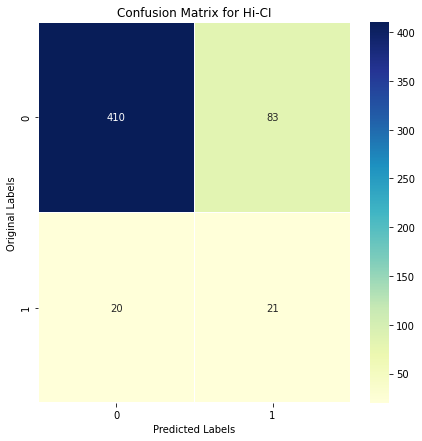

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 63, 32)            128       
_________________________________________________________________
dropout_40 (Dropout)         (None, 63, 32)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 61, 32)            3104      
_________________________________________________________________
dropout_41 (Dropout)         (None, 61, 32)            0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 59, 32)            3104      
_________________________________________________________________
dropout_42 (Dropout)         (None, 59, 32)            0         
_________________________________________________________________
max_po

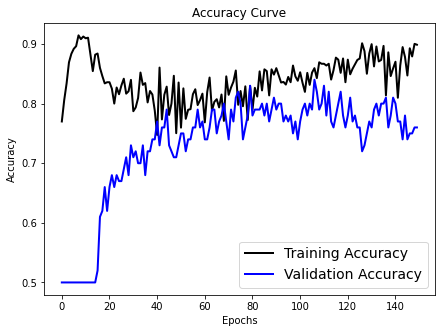

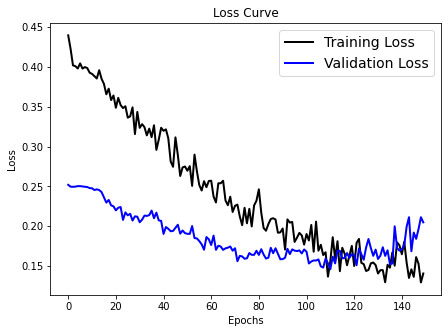

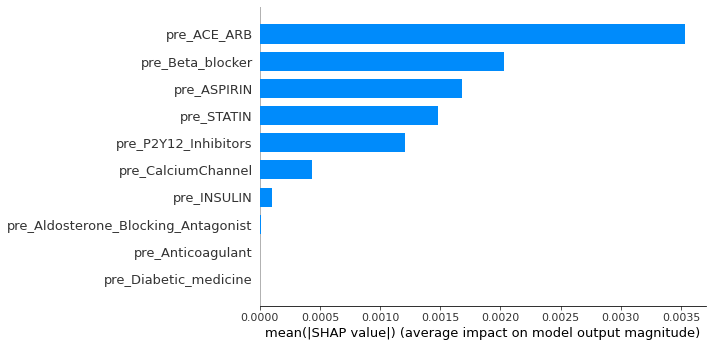

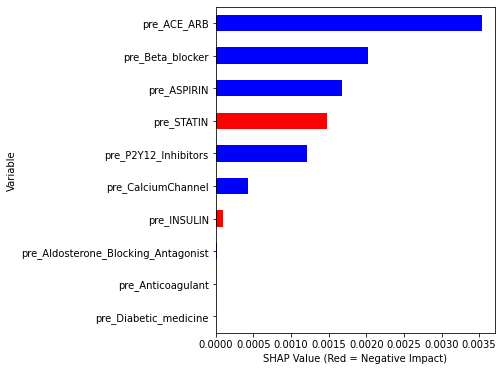

In [ ]:
I_master=Insightx(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['pre_ASPIRIN','pre_STATIN','pre_P2Y12_Inhibitors','pre_ACE_ARB','pre_INSULIN','pre_Beta_blocker','pre_CalciumChannel','pre_Aldosterone_Blocking_Antagonist','pre_Diabetic_medicine','pre_Anticoagulant'])
I_master.HiCI(encoding_dimension=40,with_imbalance=False,k_fold=5)



***INSIGHTS INITIALIZATION***




***BEST***


FOLD = 1
[0.52994792 8.84782609]
Epoch 1/150
16/16 [==============================] - 2s 70ms/step - loss: 0.4552 - accuracy: 0.5009 - val_loss: 0.2517 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 55ms/step - loss: 0.4406 - accuracy: 0.7466 - val_loss: 0.2509 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 53ms/step - loss: 0.3880 - accuracy: 0.8190 - val_loss: 0.2503 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 54ms/step - loss: 0.3879 - accuracy: 0.8411 - val_loss: 0.2494 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1

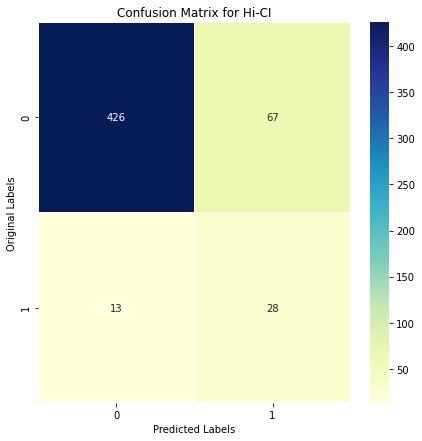

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_65 (Conv1D)           (None, 61, 32)            128       
_________________________________________________________________
dropout_104 (Dropout)        (None, 61, 32)            0         
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 59, 32)            3104      
_________________________________________________________________
dropout_105 (Dropout)        (None, 59, 32)            0         
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 57, 32)            3104      
_________________________________________________________________
dropout_106 (Dropout)        (None, 57, 32)            0         
_________________________________________________________________
max_p

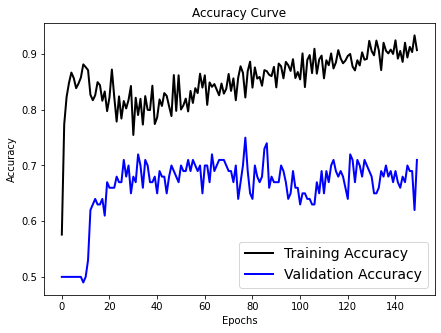

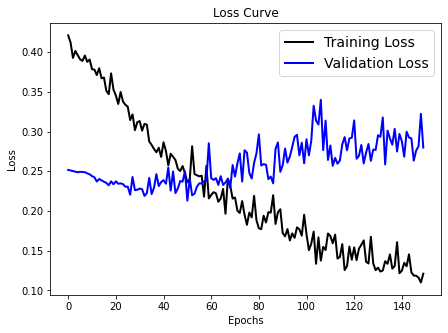

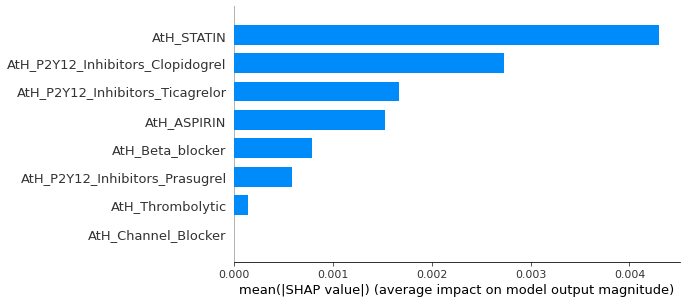

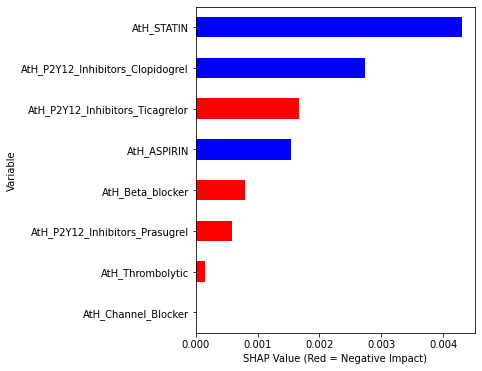

In [ ]:
I_master=Insightx(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['AtH_ASPIRIN','AtH_STATIN','AtH_P2Y12_Inhibitors_Clopidogrel','AtH_P2Y12_Inhibitors_Ticagrelor','AtH_P2Y12_Inhibitors_Prasugrel','AtH_Beta_blocker','AtH_Channel_Blocker','AtH_Thrombolytic'])
I_master.HiCI(encoding_dimension=40,with_imbalance=False,k_fold=5)



***INSIGHTS INITIALIZATION***




***BEST***


FOLD = 1
[0.52994792 8.84782609]
Epoch 1/150
16/16 [==============================] - 2s 66ms/step - loss: 0.4236 - accuracy: 0.4414 - val_loss: 0.2504 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 47ms/step - loss: 0.3935 - accuracy: 0.7150 - val_loss: 0.2517 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 47ms/step - loss: 0.4045 - accuracy: 0.8193 - val_loss: 0.2507 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 48ms/step - loss: 0.4204 - accuracy: 0.8786 - val_loss: 0.2508 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1

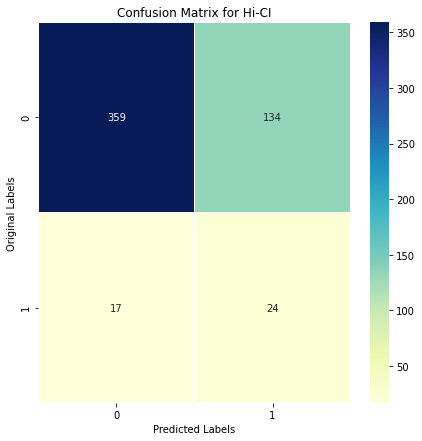

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           (None, 57, 32)            128       
_________________________________________________________________
dropout_112 (Dropout)        (None, 57, 32)            0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 55, 32)            3104      
_________________________________________________________________
dropout_113 (Dropout)        (None, 55, 32)            0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 53, 32)            3104      
_________________________________________________________________
dropout_114 (Dropout)        (None, 53, 32)            0         
_________________________________________________________________
max_p

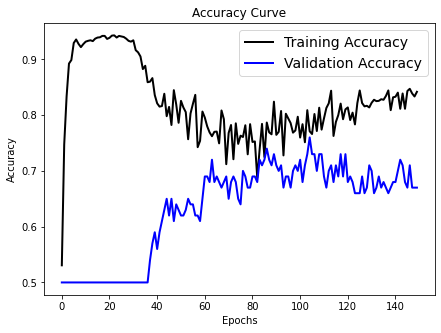

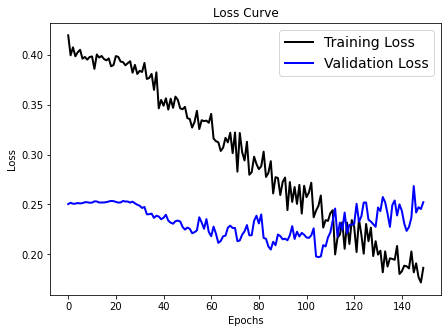

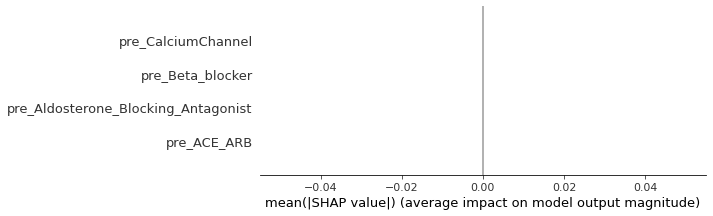

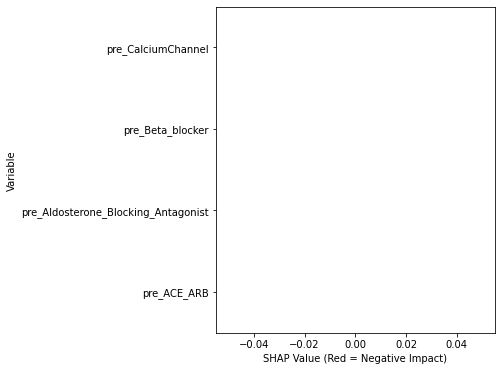

In [ ]:
I_master=Insightx(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['pre_ACE_ARB','pre_Aldosterone_Blocking_Antagonist','pre_Beta_blocker','pre_CalciumChannel'])
I_master.HiCI(encoding_dimension=40,with_imbalance=False,k_fold=5)



***INSIGHTS INITIALIZATION***




***BEST***


FOLD = 1
[0.52994792 8.84782609]
Epoch 1/150
16/16 [==============================] - 2s 64ms/step - loss: 0.4416 - accuracy: 0.6085 - val_loss: 0.2515 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 49ms/step - loss: 0.3986 - accuracy: 0.6667 - val_loss: 0.2509 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 49ms/step - loss: 0.4527 - accuracy: 0.7349 - val_loss: 0.2505 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 46ms/step - loss: 0.4005 - accuracy: 0.8122 - val_loss: 0.2508 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1

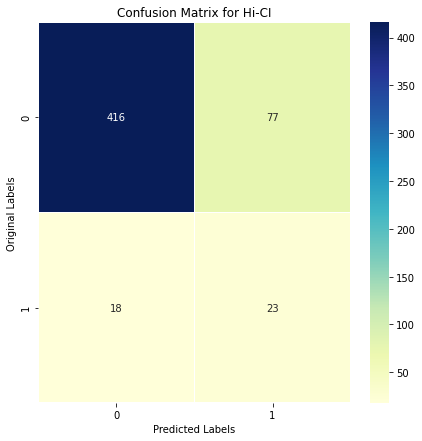

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_75 (Conv1D)           (None, 55, 32)            128       
_________________________________________________________________
dropout_120 (Dropout)        (None, 55, 32)            0         
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 53, 32)            3104      
_________________________________________________________________
dropout_121 (Dropout)        (None, 53, 32)            0         
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 51, 32)            3104      
_________________________________________________________________
dropout_122 (Dropout)        (None, 51, 32)            0         
_________________________________________________________________
max_p

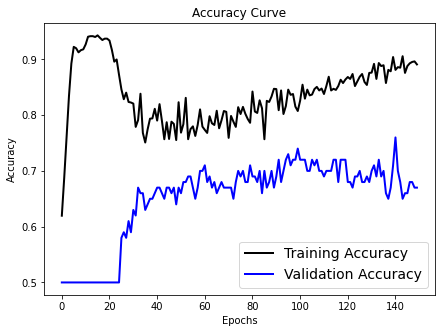

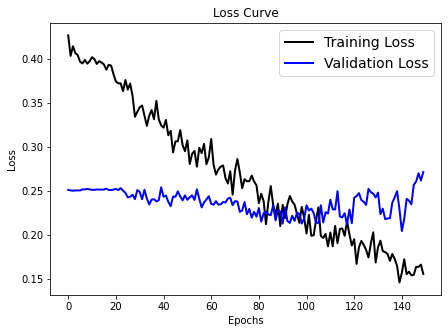

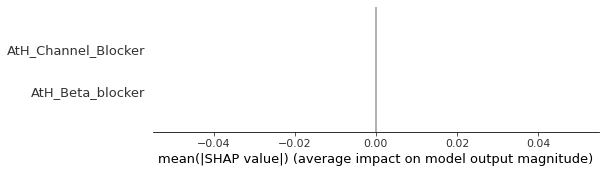

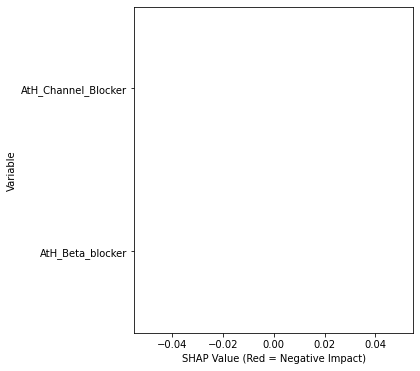

In [ ]:
I_master=Insightx(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['AtH_Beta_blocker','AtH_Channel_Blocker'])
I_master.HiCI(encoding_dimension=40,with_imbalance=False,k_fold=5)



***INSIGHTS INITIALIZATION***




***BEST***


FOLD = 1
[0.52994792 8.84782609]
Epoch 1/150
16/16 [==============================] - 2s 64ms/step - loss: 0.4400 - accuracy: 0.5078 - val_loss: 0.2512 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 44ms/step - loss: 0.4191 - accuracy: 0.7375 - val_loss: 0.2503 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 45ms/step - loss: 0.4385 - accuracy: 0.7806 - val_loss: 0.2502 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 45ms/step - loss: 0.3794 - accuracy: 0.8772 - val_loss: 0.2517 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1

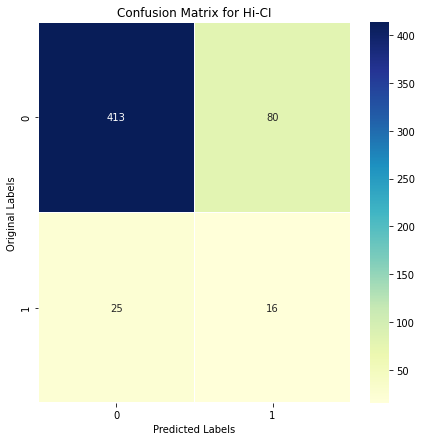

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 54, 32)            128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 54, 32)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 52, 32)            3104      
_________________________________________________________________
dropout_25 (Dropout)         (None, 52, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 50, 32)            3104      
_________________________________________________________________
dropout_26 (Dropout)         (None, 50, 32)            0         
_________________________________________________________________
max_po

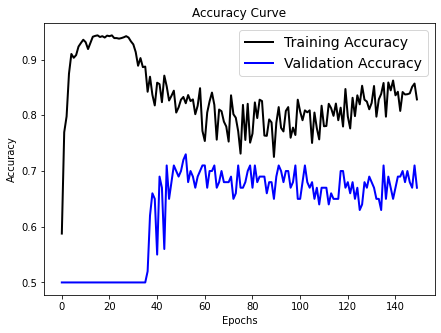

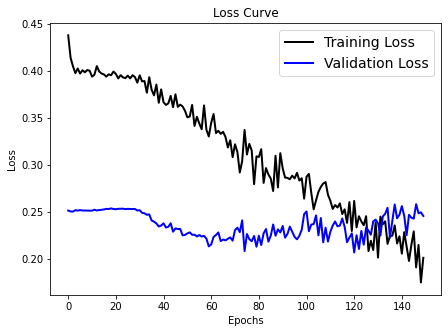

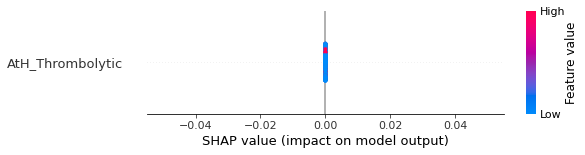

In [ ]:
I_master=Insightx(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['AtH_Thrombolytic'])
I_master.HiCI(encoding_dimension=40,with_imbalance=False,k_fold=5)

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 6.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491618 sha256=77abaa9cbca50f1432c0f8dac10111c652e3ec2a97e027e567ef7b60b2ce92e5
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
